### Importing  the Libraries

In [1]:
import numpy as np
import pandas as pd

##for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

##for interactivity
import ipywidgets
from ipywidgets import interact

In [2]:
!pip install ipywidgets

## Reading the Dataset


In [3]:
## lets read the dataset
data=pd.read_csv('Crop_recommendation.csv')

## Lets check the shape of the dataset
print("Shape of the dataset: ",data.shape)

Shape of the dataset:  (2200, 8)


In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
## check if there is any missing values present in dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
## Crops
data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

## Descriptive Statistics

In [8]:
## Lets check the summary for all the crops
print("Average Ratio of Nitrogen in the soil : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the soil : {0:.2f}".format(data['K'].mean()))
print("Average Temperature in celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average relative humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH value of soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil : 50.55
Average Ratio of Phosphorous in the soil : 53.36
Average Ratio of Potassium in the soil : 48.15
Average Temperature in celsius : 25.62
Average relative humidity in % : 71.48
Average PH value of soil : 6.47
Average Rainfall in mm : 103.46


In [9]:
data['label'].value_counts().index

Index(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
       'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango',
       'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'],
      dtype='object', name='label')

In [10]:
# lets check the Summary Statistics for each of the Crops

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'chickpea', 'kidneybeans', 'pige…

In [11]:
## Lets compare the Average Requirement for each crops with average conditions

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

## Analyzing Agricultural Coditions

## Univariate Analysis

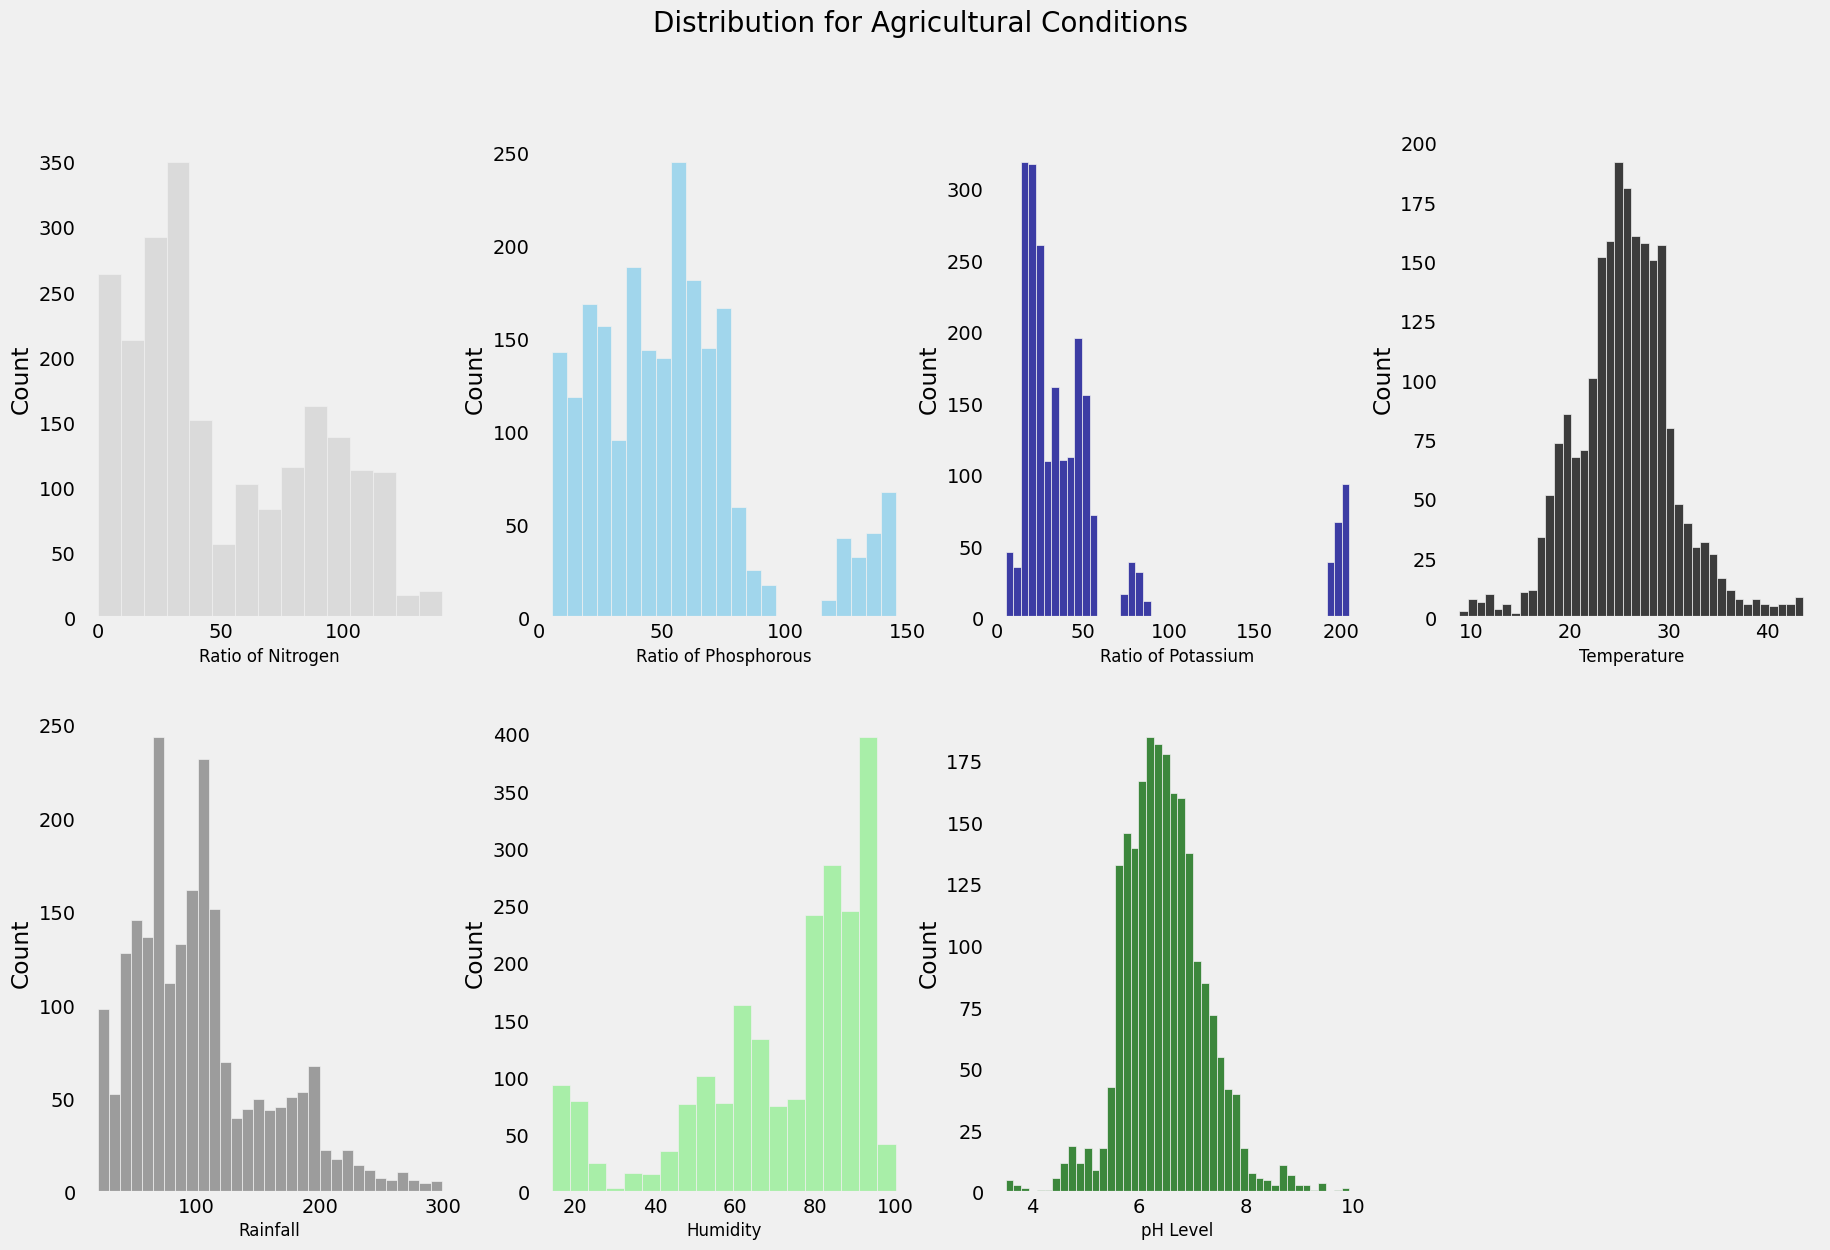

In [12]:
## check the distribution of Agricultural condition
plt.rcParams['figure.figsize']=(20,13)

plt.subplot(2,4,1)
sns.histplot(data['N'],color='lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize=12)
plt.grid()

plt.subplot(2, 4, 2)
sns.histplot(data['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.histplot(data['K'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.histplot(data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.histplot(data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.histplot(data['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.histplot(data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()


### Bivariate Analysis

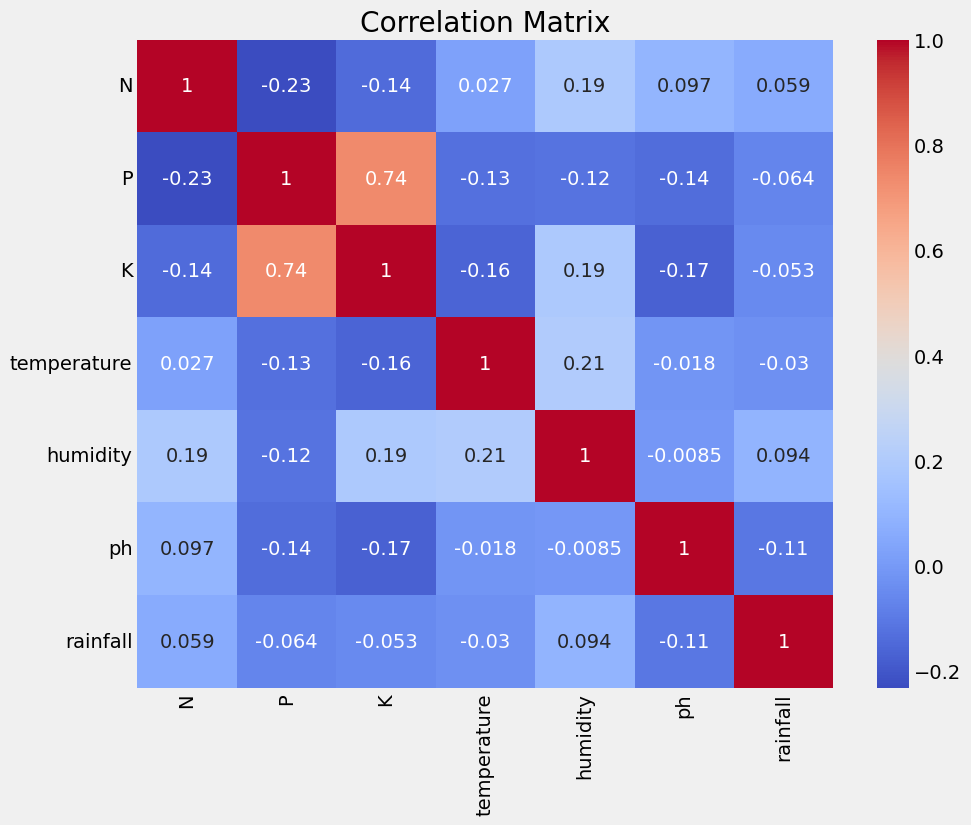

In [13]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Correlation Matrix
plt.figure(figsize=(10,8))
correlation_matrix = data[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
# sns.pairplot(data, vars=features, hue='label', palette='Set1')
# plt.show()


In [14]:
## Lets understand which crops can only be grown in summer season, Winter season and Rainy season

print("Summer Crops")
print(data[(data['temperature']> 30) & (data['humidity'] > 50)] ['label'].unique())
print("------------------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)] ['label'].unique())
print("-------------------------------------------")
print("Rainy Crops")
print(data[(data['rainfall']> 200) & (data['humidity'] > 30)] ['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


## Clustering Similar Crops

## Visualizing the hidden patterns

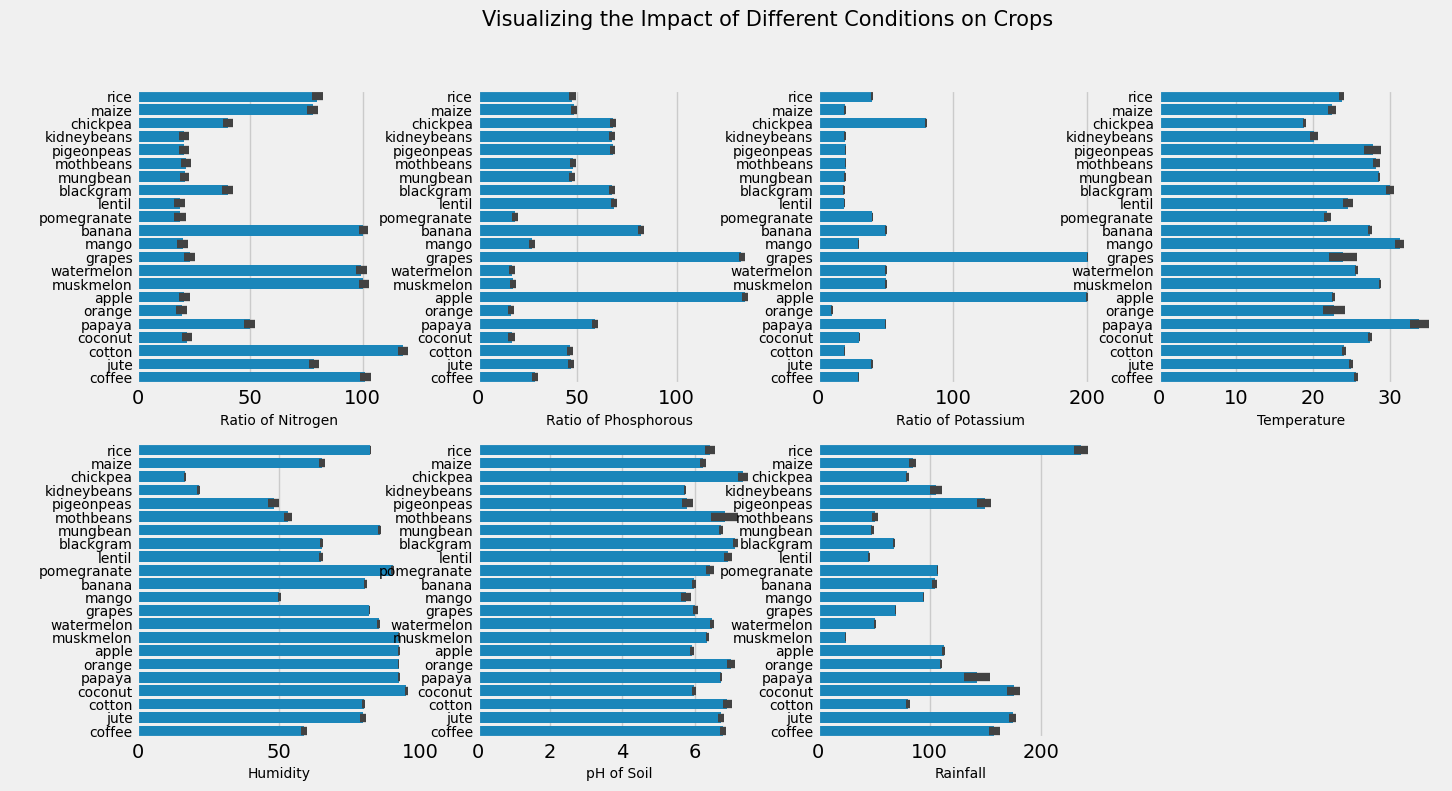

In [15]:
### Data Visualizations

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(x= data['N'] , y= data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(x=data['P'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(x=data['K'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(x=data['temperature'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(x=data['humidity'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(x=data['ph'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(x=data['rainfall'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

## Predictive Modelling

In [16]:
y=data['label']
x=data.drop(['label'], axis=1)

print("Shape of x:",x.shape)
print("Shape of y:",y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [17]:
# lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1540, 7)
The Shape of x test: (660, 7)
The Shape of y train: (1540,)
The Shape of y test: (660,)


In [18]:
## creating a predictive model
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

c:\Users\Public\Anaconda3\envs\durv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
## Evaluate the model performance
from sklearn.metrics import classification_report,accuracy_score

# lets print the Classification Report also
accuracy=accuracy_score(y_test,y_pred)
print("accuracy of the model :", accuracy *100)


accuracy of the model : 95.0


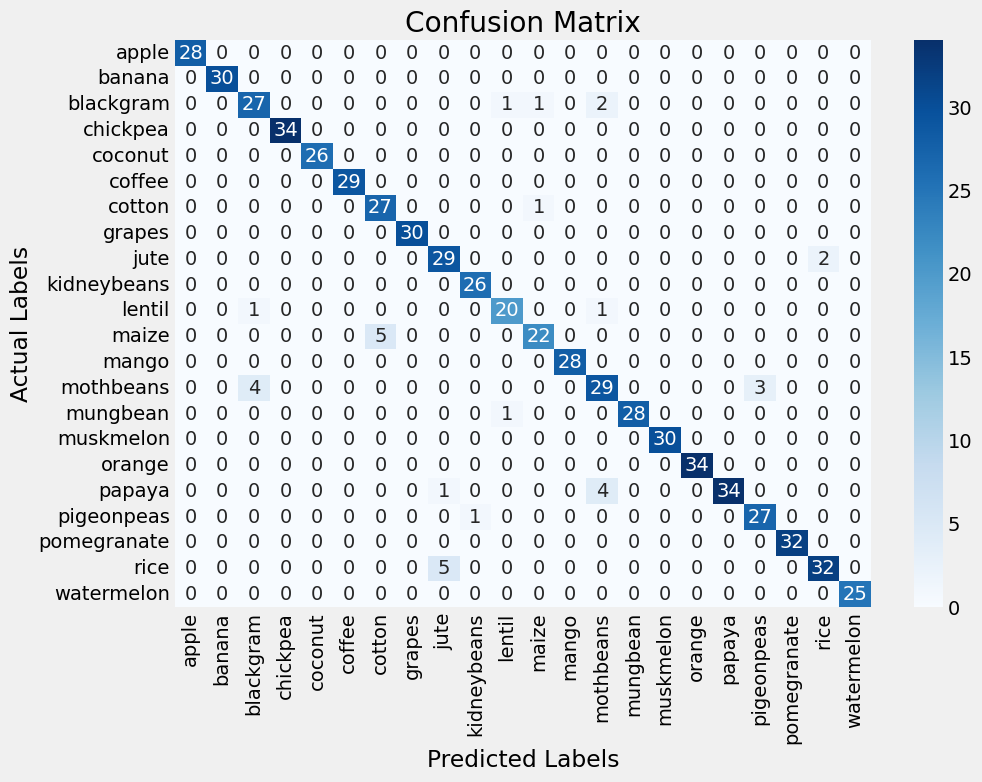

In [20]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a DataFrame for better readability
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()



In [21]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.84      0.87      0.86        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.84      0.96      0.90        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.91      0.91      0.91        22
       maize       0.92      0.81      0.86        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.81      0.81      0.81        36
    mungbean       1.00      0.97      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [22]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [23]:
prediction = model.predict((np.array([[90,
                                       40,
                                       40,
                                       20,
                                       80,
                                       7,
                                       200]])))
print("The Suggested Crop for given Climatic Condition is :", prediction)

The Suggested Crop for given Climatic Condition is : ['rice']


c:\Users\Public\Anaconda3\envs\durv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
# lets check the Model for Oranges also
data[data['label'] == 'orange'].head()

,N,P,K,temperature,humidity,ph,rainfall,label
1600,22,30,12,15.781442,92.510777,6.354007,119.035002,orange
1601,37,6,13,26.030973,91.508193,7.511755,101.284774,orange
1602,27,13,6,13.360506,91.356082,7.335158,111.226688,orange
1603,7,16,9,18.879577,92.043045,7.813917,114.665951,orange
1604,20,7,9,29.477417,91.578029,7.129137,111.172750,orange


In [25]:
# lets do some Real time Predictions
prediction = model.predict((np.array([[20,
                                       30,
                                       10,
                                       15,
                                       90,
                                       7.5,
                                       100]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['orange']


c:\Users\Public\Anaconda3\envs\durv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
import pickle

# Assuming 'model' is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
